<h1><font size="5">LINEAR REGRESSION WITH TENSORFLOW</font></h1>

<h2>Linear Regression</h2>

Defining a linear regression in simple terms, is the approximation of a linear model used to describe the relationship between two or more variables. In a simple linear regression there are two variables, the dependent variable, which can be seen as the "state" or "final goal" that we study and try to predict, and the independent variables, also known as explanatory variables, which can be seen as the "causes" of the "states". 

When more than one independent variable is present the process is called multiple linear regression. <br>
When multiple dependent variables are predicted the process is known as multivariate linear regression.

The equation of a simple linear model is

$$Y = w X + b $$

Where Y is the dependent variable and X is the independent variable, and <b>w</b> and <b>b</b> being the parameters we adjust. <b>w</b> is known as "slope" or "gradient" or "weights" and <b>b</b> is the "intercept" or "biases". You can interpret this equation as Y being a function of X, or Y being dependent on X.

If you plot the model, you will see it is a line, and by adjusting the "slope" parameter you will change the angle between the line and the independent variable axis, and the "intercept parameter" will affect where it crosses the dependent variable's axis.

Let's first import the required packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.patches as mpatches

%matplotlib inline

Let's define the independent variable:

In [2]:
X = np.arange(0.0, 5.0, 0.1)
X

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])

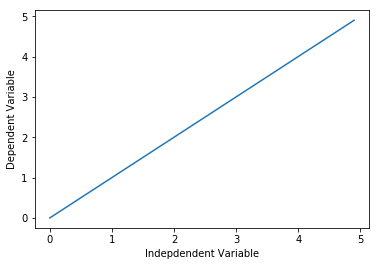

In [3]:
##You can adjust the slope and intercept to verify the changes in the graph
w = 1
b = 0

Y = w * X + b 

plt.plot(X, Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

When we perform an experiment and gather the data, or if we already have a dataset and we want to perform a linear regression, what we will do is adjust a simple linear model to the dataset, we adjust the "slope" and "intercept" parameters to the data the best way possible, because the closer the model comes to describing each ocurrence, the better it will be at representing them.

So how is this "regression" performed?

<h2>Linear Regression with TensorFlow</h2>

A simple example of a linear function can help us understand the basic mechanism behind TensorFlow.

For the first part we will use a sample dataset, and then we'll use TensorFlow to adjust and get the right parameters.


<h3>Understanding the Data</h3>

<h4><code>FuelConsumptionCo2</code>:</h4>

We have downloaded a fuel consumption dataset, <b><code>FuelConsumption.csv</code></b>, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. <a href="http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64">Dataset source</a>

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

In [4]:
df = pd.read_csv("FuelConsumptionCo2.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Lets say we want to use linear regression to predict Co2Emission of cars based on their engine size. So, lets define X and Y value for the linear regression, that is, features and labels:

In [5]:
features = df[['ENGINESIZE']].values
labels = df[['CO2EMISSIONS']].values

We are going to define a loss function for our regression, so we can train our model to better fit our data. In a linear regression, we minimize the squared error of the difference between the predicted values(obtained from the equation) and the target values (the data that we have). In other words we want to minimize the square of the predicted values minus the target value. So we define the equation to be minimized as loss.

Then, we define the optimizer method. The Adam optimizer takes in parameter: learning rate, which corresponds to the speed with which the optimizer should learn; there are pros and cons for increasing the learning-rate parameter, with a high learning rate the training model converges quickly, but there is a risk that a high learning rate causes instability and the model will not converge. On the other hand decreasing the learning rate might reduce the convergence speed, but it would increase the chance of converging to a solution. We should note that the solution might not be a global optimal solution as there is a chance that the optimizer will get stuck in a local optimal solution. 

Now we will define the training method of our graph, what method we will use for minimize the loss? We will use the <b>.minimize()</b> which will minimize the error function of our optimizer, resulting in a better model.

In [6]:
graph = tf.Graph()

In [7]:
with graph.as_default():
    
    # Input data placeholders
    with tf.name_scope('PlaceHolders'):
        X = tf.placeholder(tf.float32, name='X')
        y = tf.placeholder(tf.float32, name='y')
        
    # First, we initialize the variables w and b, with a random number
    with tf.name_scope('Variables'):
        w = tf.Variable(0.0, name='Weights', dtype=tf.float32)
        b = tf.Variable(0.0, name='biases', dtype=tf.float32)
    
    # Define our linear model
    with tf.name_scope('Model'):
        Y = w * X + b
    
    # Define the cost function for our data by taking mse of predicted values and targets
    with tf.name_scope('Cost_Function'):
        loss = tf.losses.mean_squared_error(y, Y)
        
    with tf.name_scope('Train'):
        opt = tf.train.AdamOptimizer(0.5)    # Change the learning rate to find the optimum value
        train = opt.minimize(loss)

Don't forget to initialize the variables before executing a graph:

In [8]:
epochs = 200
loss_val = []

with tf.Session(graph=graph) as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    writer = tf.summary.FileWriter('graph')
    writer.add_graph(graph)
    writer.close()
    
    # Training Steps without batching
    for e in range(epochs):
        _, loss_ = sess.run([train, loss], feed_dict={X:features, y:labels})
        loss_val.append(loss_)
    Y_ = sess.run(Y, feed_dict={X:features, y:labels})    

Lets plot the loss values to see how it has changed during the training:

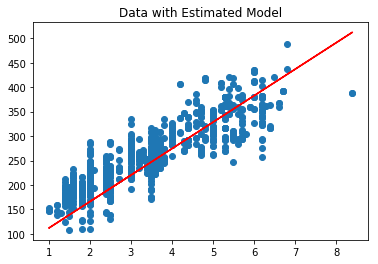

In [9]:
plt.scatter(features, labels)
plt.plot(features, Y_, 'r')
plt.title('Data with Estimated Model')
plt.show()

Plot the cost function error rate over the training set.

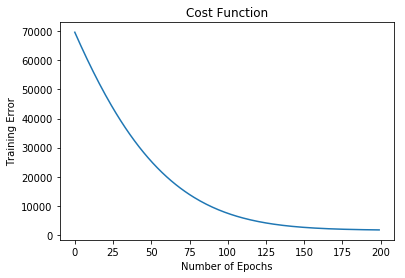

In [10]:
plt.plot(loss_val)
plt.xlabel('Number of Epochs')
plt.ylabel('Training Error')
plt.title('Cost Function')
plt.show()

In [ ]:
! tensorboard --logdir='graph/'

<h3>Our Computation Graph Overview</h3>

<img src="graph.PNG">